## Logistic Regression

In this notebook, we're going to Logistic Regression using sklearn and analyse the seattleWeather Dataset.

### Problem Statement
One of the aspects Seattle is most notable for, in addition to coffee, grunge, and electronic businesses, is its rains. From January 1, 1948 to
December 12, 2017, this dataset provides full records of Seattle's daily rainfall patterns.

Data Dictionary
Following are the variables with their definition and key:
Variables Description
- DATE The date of the observation
- PRCP The amount of precipitation, in inches
- MAX The maximum temperature for that day, in degrees Fahrenheit
- TMIN The minimum temperature for that day, in degrees Fahrenheit
- RAIN TRUE if rain was observed on that day, FALSE if it was not

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

In [26]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset
data = pd.read_csv('seattleWeather_1948-2017.csv')

In [4]:
# Preview the first 5 rows information
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [5]:
#See columns in data
data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

In [8]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [9]:
# Checking for null values
data.isna().sum(axis=0)

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [10]:
#Finding rows having null values in the 'PRCP' columns
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [11]:
#Finding rows having null values in the 'RAIN' columns
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


<AxesSubplot:xlabel='RAIN', ylabel='count'>

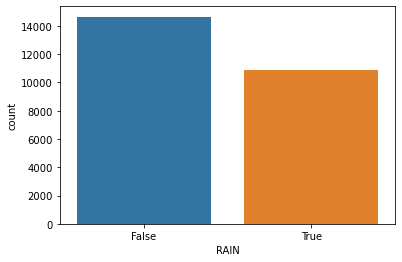

In [12]:
# Plot the graph to determine the chances of rain
sns.countplot(data=data, x='RAIN')

In [13]:
#It is safer to insert a mean value in the PRCP column instead of dropping row.
data['PRCP'].mean()

0.10622162204477956

In [14]:
#Custom function to determine the chances of 'RAIN'
def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN

In [15]:
def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return data['PRCP'].mean()
    else:
        return PRCP

In [16]:
#Applying function to determine the chances of rain
data['RAIN']=data[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [17]:
##Applying function to determine the chances of rain
data['PRCP']=data[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [19]:
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [20]:
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


#### Exploratory Data Analysis

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

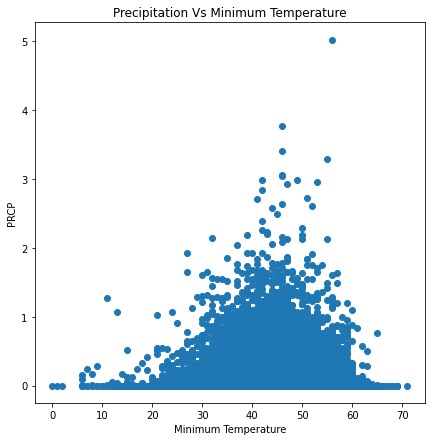

In [21]:
#First explore data for Temperature and Percipitation
plt.figure(figsize=(7,7))
plt.scatter(x='TMIN',y='PRCP',data=data)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

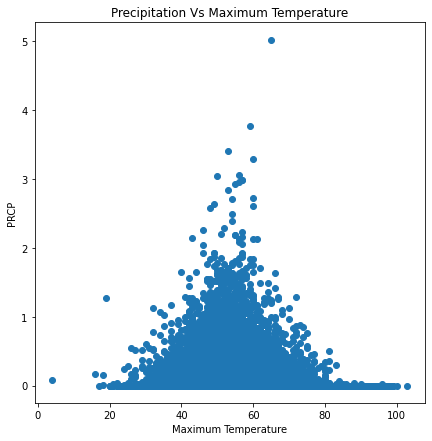

In [23]:
#Plot graph to determine the correlation between Precipitation and Maximum Temperature
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=data)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')

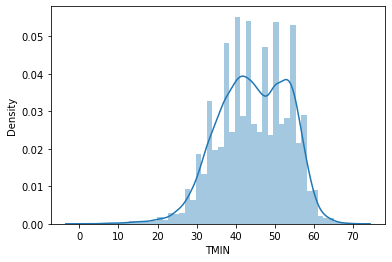

In [27]:
#Plotting Distribution Plot
sns.distplot(data['TMIN']);

<AxesSubplot:xlabel='TMAX', ylabel='Density'>

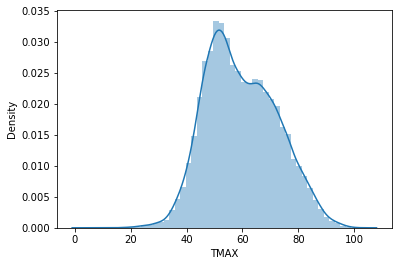

In [28]:
#Plotting Distribution Plot
sns.distplot(data['TMAX'])

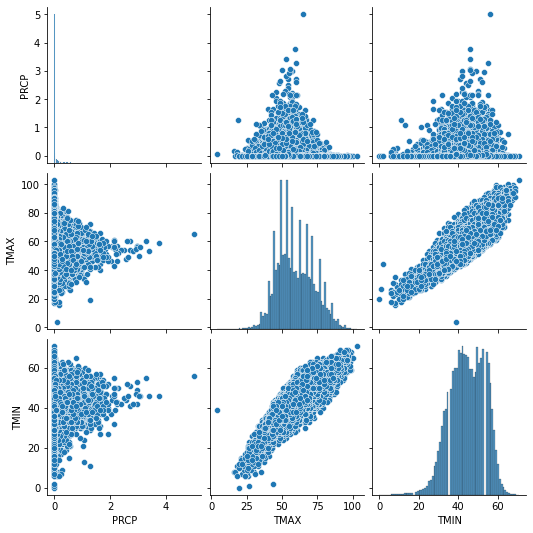

In [29]:
#Plotting pairplot
sns.pairplot(data=data)

<AxesSubplot:>

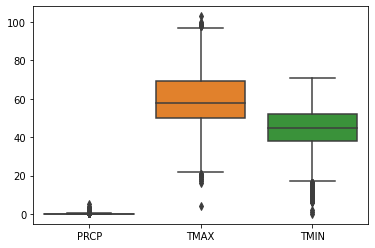

In [30]:
#Plotting boxplot to check outlier
sns.boxplot(data=data)

#### Outlier Treatment


In [31]:
#Dropping the outliers from TMIN column
data=data.drop(data[data['TMIN']<17 ].index)

In [32]:
#Dropping the outliers from TMAX columns i.e. the value more than 100
data=data.drop(data[(data['TMAX']>97.5) | (data['TMAX']< 21.5)].index)

In [33]:
#Dropping the outliers from PRCP columns i.e. the value more than 0.275
data=data.drop(data[(data['PRCP']>0.25) | (data['PRCP']< -0.15) ].index)

<AxesSubplot:>

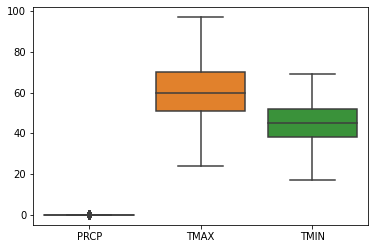

In [34]:
sns.boxplot(data=data)

### Logistic Regression
Logistic Regression is widely used to predict binary outcomes for a given set of independent variables.

In [37]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [38]:
lr= LogisticRegression()

In [39]:
#Importing "train_test-split" function to test the model
from sklearn.model_selection import train_test_split

In [40]:
X=data.drop(['RAIN','DATE'],axis=1)
y=data['RAIN']
y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
#Fit the model in train and test data
lr.fit(X_train,y_train).score(X_train,y_train)

0.9147797716150081

In [44]:
#Now fitting the model in test set
prediction=lr.predict(X_test)
prediction

array(['False', 'False', 'False', ..., 'False', 'False', 'False'],
      dtype=object)

In [43]:
#Printing first 5 rows after fitting the model in test set
print (X_test.head())

       PRCP  TMAX  TMIN
19451   0.0    46    36
22826   0.0    65    50
14015   0.0    64    42
5419    0.0    63    45
10264   0.0    52    31
